- https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

### Import Libraries

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing Filtered Data

In [9]:
os.chdir(r"C:\Users\Samarpit\Desktop\LEARBAY\weekday2019_09_05\Assignments\Samarpit")
aus = pd.read_excel(r"AustraliaFiltered.xlsx")
aus.head(2)

,Unnamed: 0,Country,AreaName,Region,DevName,1980,1981,1982,1983,1984,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
0,224,Afghanistan,Asia,Southern Asia,Developing regions,10,20,30,30,70,...,100,20,40,70,80,110,180,140,560,4630
1,225,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,110,110,200,250,140,130,110,110,140,1910


##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants

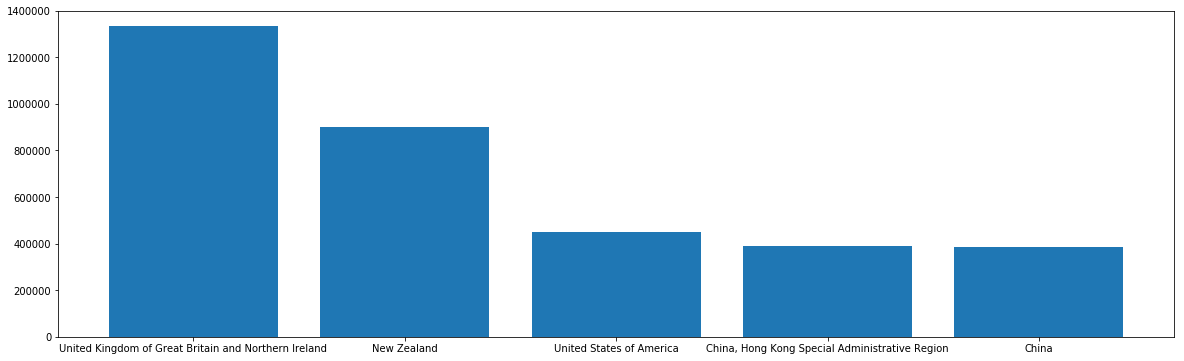

In [33]:
aus_top5=aus.groupby("Country").sum()
aus_top5 = aus.nlargest(5,'Total')
plt.figure(figsize=(20,6))
plt.bar(aus_top5.Country,aus_top5.Total)
plt.show()

- Find total immigrants from each category by area name and plot barchart for each area

<Figure size 1152x576 with 0 Axes>

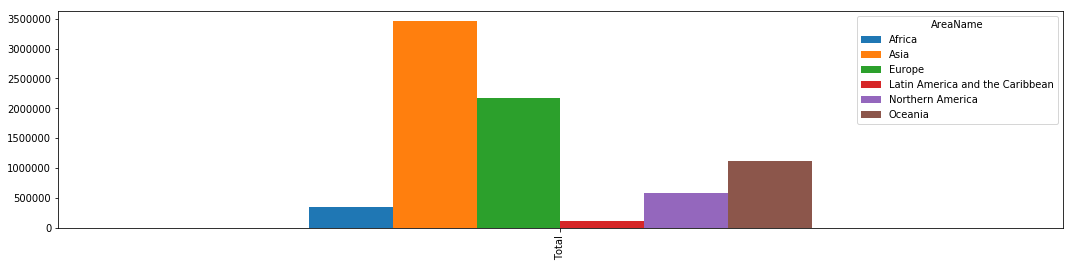

In [206]:
plt.figure(figsize=(16,8))
aus_pivot = aus.pivot_table(columns='AreaName', values='Total',aggfunc=sum)
aus_pivot.plot(kind='bar',figsize=(18,4))

### Other Solution

<BarContainer object of 6 artists>

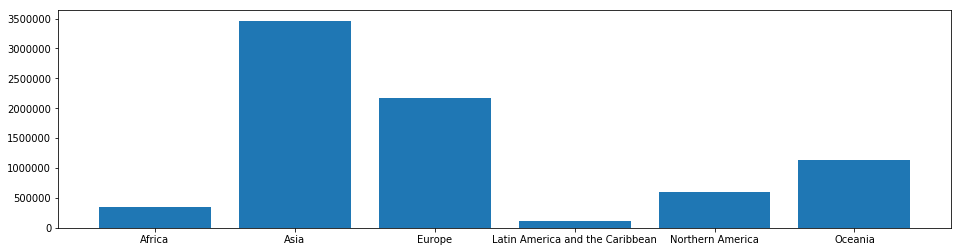

In [247]:
plt.figure(figsize=(16,4))
aus_areaname=aus.groupby("AreaName").sum()
aus_areaname.index
plt.bar(aus_areaname.index,aus_areaname.Total)

- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.

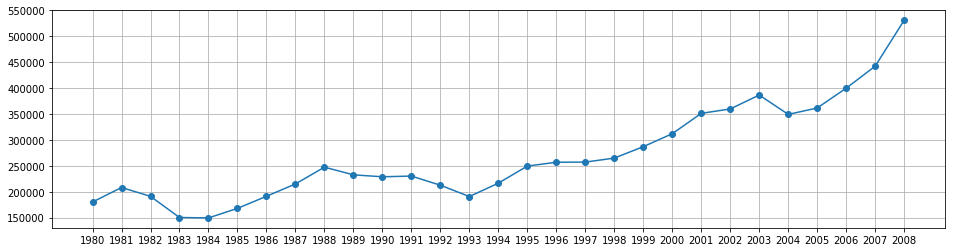

In [245]:
plt.figure(figsize=(16,4))
sumtable= aus.sum(axis=0)
sumtable1=sumtable[5:34]
sumtable1
plt.plot(sumtable1,'-o')
plt.grid()

## For knowledge only
#### Examples
- df.plot.line()
- df.plot.scatter('x', 'y')
- df.plot.hexbin()

- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).

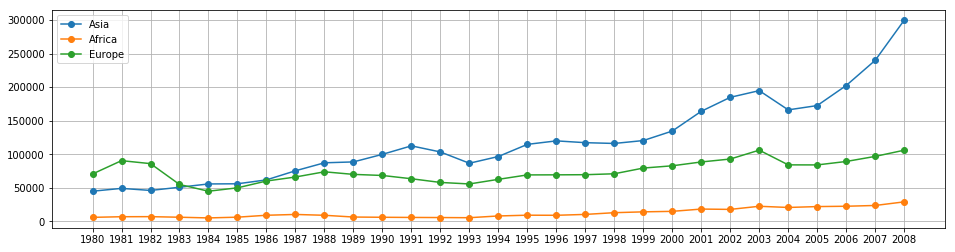

In [244]:
plt.figure(figsize=(16,4))
asia=aus[aus.AreaName=='Asia'].sum()
africa=aus[aus.AreaName=='Africa'].sum()
europe=aus[aus.AreaName=='Europe'].sum()
asiasum,africasum,europesum =asia[5:34], africa[5:34], europe[5:34]
plt.plot(asiasum,'-o',label="Asia")
plt.plot(africasum,'-o',label="Africa")
plt.plot(europesum,'-o',label="Europe")
plt.legend()
plt.grid()

- Plot Total Immigrants based on DevelopmenRegion  

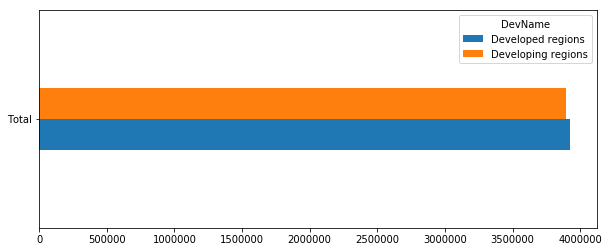

In [228]:
devregion=aus.pivot_table(columns='DevName',values='Total',aggfunc=sum)
devregion
devregion.plot(kind='barh',figsize=(10,4),width=.2)

### Other Solution

<BarContainer object of 2 artists>

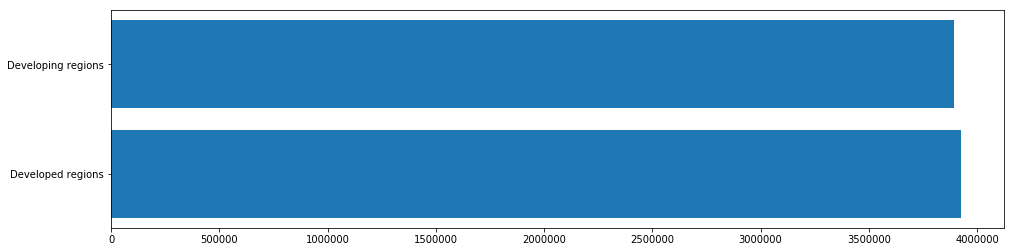

In [249]:
plt.figure(figsize=(16,4))
new=aus.groupby("DevName").sum()
plt.barh(new.index,new.Total,fill=True)

- Plot immigration trend for India using line plot

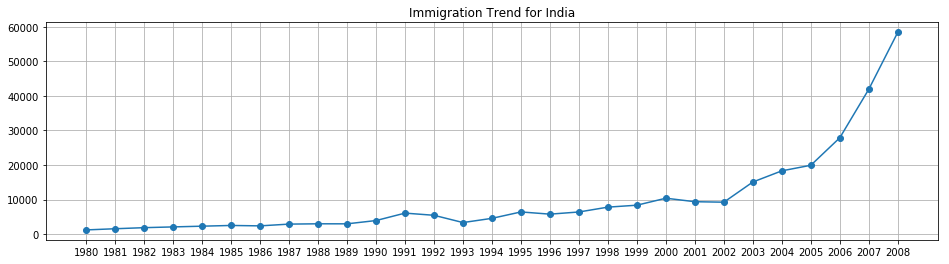

In [243]:
plt.figure(figsize=(16,4))
india = aus[aus.Country=='India'].sum()
india=india[5:34]
plt.plot(india,'-o')
plt.title("Immigration Trend for India")
plt.grid()

- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot

##### Above line graphs can be done using below method

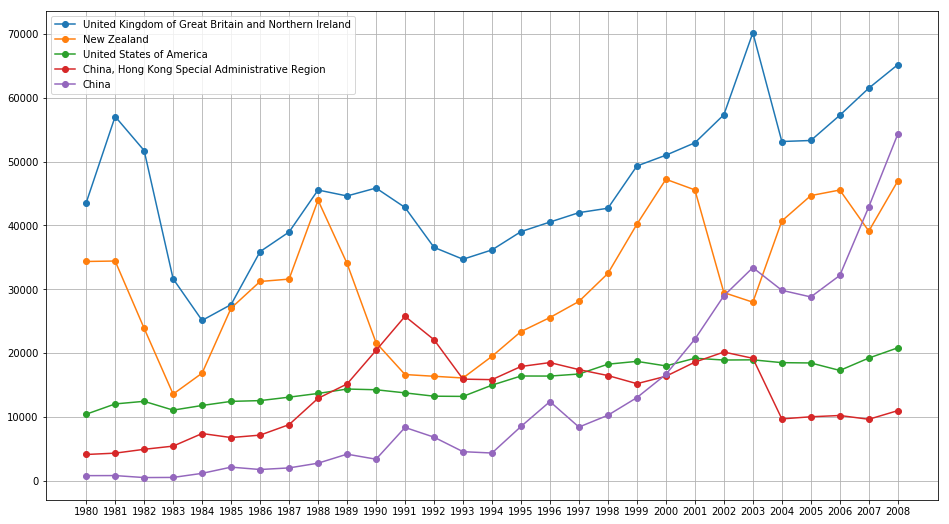

In [355]:
plt.figure(figsize=(16,9))
New_aus_data= aus.drop(columns='Unnamed: 0')
grouping_country=New_aus_data.groupby("Country").sum()
grouping_country5 = grouping_country.nlargest(5,'Total')
grouping_country5.drop(columns='Total',inplace=True)

for i in grouping_country5.index:
    plt.plot(grouping_country5.loc[i],'-o',label=i)
plt.legend()
plt.grid()

- For the above use area plot with alpha = 0.5

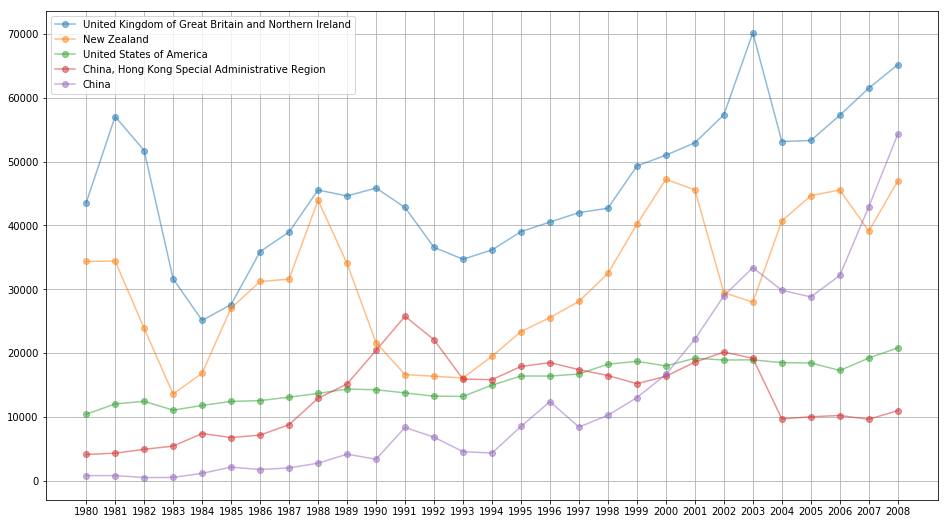

In [354]:
plt.figure(figsize=(16,9))
New_aus_data= aus.drop(columns='Unnamed: 0')
grouping_country=New_aus_data.groupby("Country").sum()
grouping_country5 = grouping_country.nlargest(5,'Total')
grouping_country5.drop(columns='Total',inplace=True)

for i in grouping_country5.index:
    plt.plot(grouping_country5.loc[i],'-o',label=i,alpha=0.5)
plt.legend()
plt.grid()




- Compare Immigration Trend for top-5 countires using stacked area plot  
  -DOUBT

In [356]:
# plot5_table=new_aus[['Country','Total']]
# plot5_table
# grouping=plot5_table.groupby("Country").sum()
# grouping
# plot6_table=grouping.nlargest(5,'Total')
# plot6_table
# plot6_table.plot(kind='area',figsize=(16,9))
